In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

ModuleNotFoundError: No module named 'sklearn_extra'

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2177966 sha256=c535b61845fc38d7bfe763569f6dbaa1f811fc55e6b8ec2a8fdb5bb113f82268
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [4]:
pip install "numpy<2.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
from sklearn_extra.cluster import KMedoids

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.05, random_state=42)

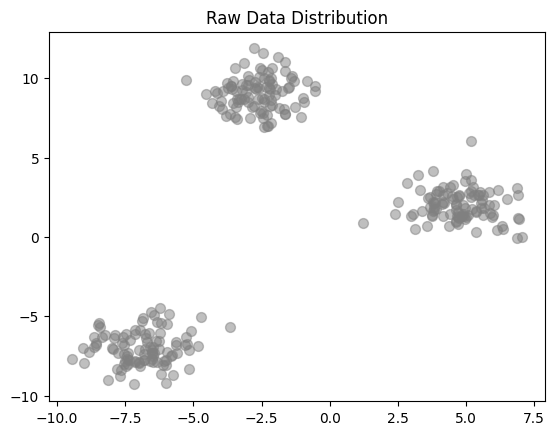

In [4]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.5)
plt.title("Raw Data Distribution")
plt.show()

In [5]:
k = 3
kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
kmedoids.fit(X)

KMedoids(n_clusters=3, random_state=42)

In [6]:
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_

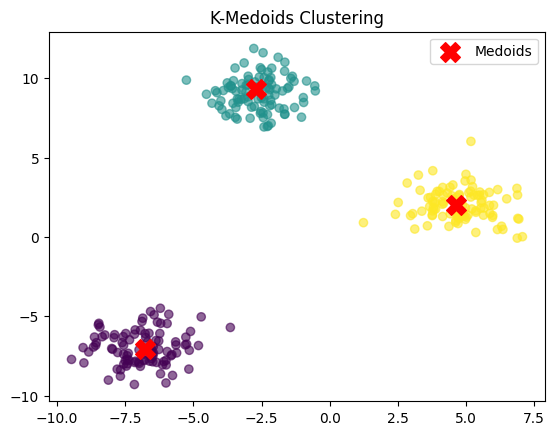

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

In [9]:
costs = []
sil_scores = []
k_values = range(2, 10)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
    kmedoids.fit(X)
    costs.append(kmedoids.inertia_)
    sil_scores.append(silhouette_score(X, kmedoids.labels_))

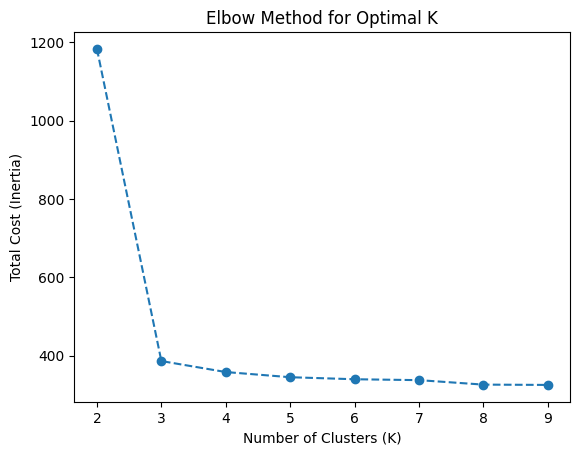

In [10]:
plt.plot(k_values, costs, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Cost (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

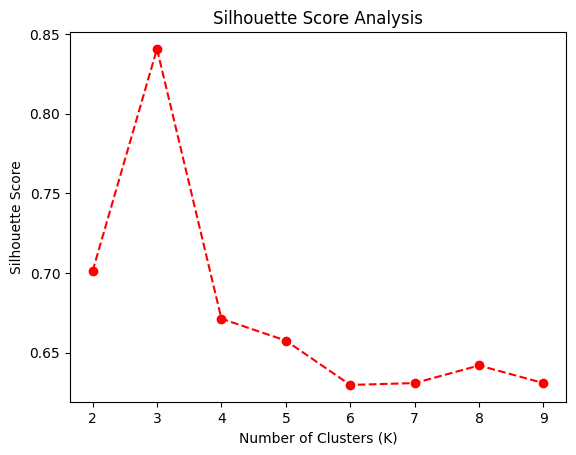

In [11]:
plt.plot(k_values, sil_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

In [13]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [14]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [17]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [16]:
kmedoids = KMedoids(n_clusters=5, metric='manhattan', random_state=42)
kmedoids.fit(X)

KMedoids(metric='manhattan', n_clusters=5, random_state=42)

In [18]:
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_

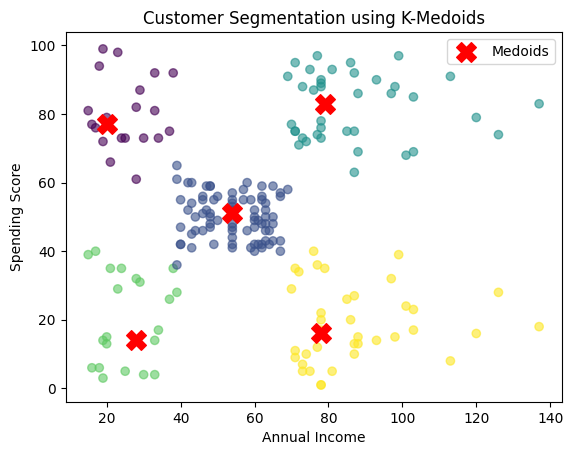

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Medoids")
plt.legend()
plt.show()